In [2]:
# retina
%config InlineBackend.figure_format = 'retina'

In [3]:
import os
from pathlib import Path
import pickle
import eazy

In [4]:
params = {}
params['FILTERS_RES']       = "test_lvf_ubvjk.res"
params['TEMPLATES_FILE']    = "BROWN_COSMOS.template"
params['WAVELENGTH_FILE ']  = "../lambda.def" # check this
params['TEMP_ERR_FILE']     = "../template_error_cosmos2020.txt"

params['TEMPLATE_COMBOS']   = 1
params['TEMP_ERR_A2']       = 0.2
params['SYS_ERR']           = 0.01

params['MW_EBV']            = 0.012
params['CAT_HAS_EXTCORR']   = True

params['CATALOG_FILE']      = "test_synphot_all.dat" 

dir_output = Path("output")

if not dir_output.exists():
    dir_output.mkdir()
params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params['MAIN_OUTPUT_FILE']  = "output"

params['APPLY_PRIOR']       = True 
params['PRIOR_FILE']        = "../prior_K_TAO.dat"
params['PRIOR_FILTER']      = 107  # 2MASS Ks band
params['PRIOR_ABZP']        = 23.9
params['PRIOR_FLOOR']       = 0.01

params['FIX_ZSPEC']         = False
params['Z_MIN']             = 0.0
params['Z_MAX']             = 1.0
params['Z_STEP']            = 0.01
params['Z_STEP_TYPE']       = 1

In [7]:
lines = open("../BROWN_COSMOS.list").readlines()
with open(params['TEMPLATES_FILE'], 'w') as f:
    for i, line in enumerate(lines):
        if not line.startswith('#'):
            f.write(f'{i+1:3d} ../{line}')

Read default param file: /opt/anaconda3/envs/native/lib/python3.12/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: test_synphot_all.dat
   >>> NOBJ = 4
F1C01 E1C01 (  1): Band1_1
F1C02 E1C02 (  2): Band1_2
F1C03 E1C03 (  3): Band1_3
F1C04 E1C04 (  4): Band1_4
F1C05 E1C05 (  5): Band1_5
F1C06 E1C06 (  6): Band1_6
F1C07 E1C07 (  7): Band1_7
F1C08 E1C08 (  8): Band1_8
F1C09 E1C09 (  9): Band1_9
F1C10 E1C10 ( 10): Band1_10
F1C11 E1C11 ( 11): Band1_11
F1C12 E1C12 ( 12): Band1_12
F1C13 E1C13 ( 13): Band1_13
F1C14 E1C14 ( 14): Band1_14
F1C15 E1C15 ( 15): Band1_15
F1C16 E1C16 ( 16): Band1_16
F1C17 E1C17 ( 17): Band1_17
F2C01 E2C01 ( 18): Band2_1
F2C02 E2C02 ( 19): Band2_2
F2C03 E2C03 ( 20): Band2_3
F2C04 E2C04 ( 21): Band2_4
F2C05 E2C05 ( 22): Band2_5
F2C06 E2C06 ( 23): Band2_6
F2C07 E2C07 ( 24): Band2_7
F2C08 E2C08 ( 25): Band2_8
F2C09 E2C09 ( 26): Band2_9
F2C10 E2C10 ( 27): Band2_10
F2C11 E2C11 ( 28): Band2_11
F2C12 E2C12 ( 29): Band2_12
F2C13 E2C13 ( 30): Band2_13
F2C14 E2C14

Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  ../prior_K_TAO.dat
Template grid: BROWN_COSMOS.template (this may take some time)


100%|██████████| 160/160 [12:37<00:00,  4.73s/it]


Template   0: Arp_118_spec.dat (NZ=1).
Template   1: Arp_256_N_spec.dat (NZ=1).
Template   2: Arp_256_S_spec.dat (NZ=1).
Template   3: CGCG_049-057_spec.dat (NZ=1).
Template   4: CGCG_436-030_spec.dat (NZ=1).
Template   5: CGCG_453-062_spec.dat (NZ=1).
Template   6: Ell1_A_0.sed (NZ=1).
Template   7: Ell2_A_0.sed (NZ=1).
Template   8: Ell3_A_0.sed (NZ=1).
Template   9: Ell4_A_0.sed (NZ=1).
Template  10: Ell5_A_0.sed (NZ=1).
Template  11: Ell6_A_0.sed (NZ=1).
Template  12: Ell7_A_0.sed (NZ=1).
Template  13: Haro_06_spec.dat (NZ=1).
Template  14: IC_0691_spec.dat (NZ=1).
Template  15: IC_0860_spec.dat (NZ=1).
Template  16: IC_0883_spec.dat (NZ=1).
Template  17: IC_4051_spec.dat (NZ=1).
Template  18: IC_4553_spec.dat (NZ=1).
Template  19: IC_5298_spec.dat (NZ=1).
Template  20: III_Zw_035_spec.dat (NZ=1).
Template  21: II_Zw_096_spec.dat (NZ=1).
Template  22: IRAS_08572+3915_spec.dat (NZ=1).
Template  23: IRAS_17208-0014_spec.dat (NZ=1).
Template  24: Mrk_0331_spec.dat (NZ=1).
Template  25

70it [00:00, 24501.48it/s]
100%|██████████| 70/70 [00:00<00:00, 70.33it/s]
/opt/anaconda3/envs/native/lib/python3.12/site-packages/eazy/photoz.py:6144: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  draws = np.random.multivariate_normal((coeffs_i*An)[ok_temp],


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=4)
Fit 1.1 s (n_proc=8, NOBJ=4)


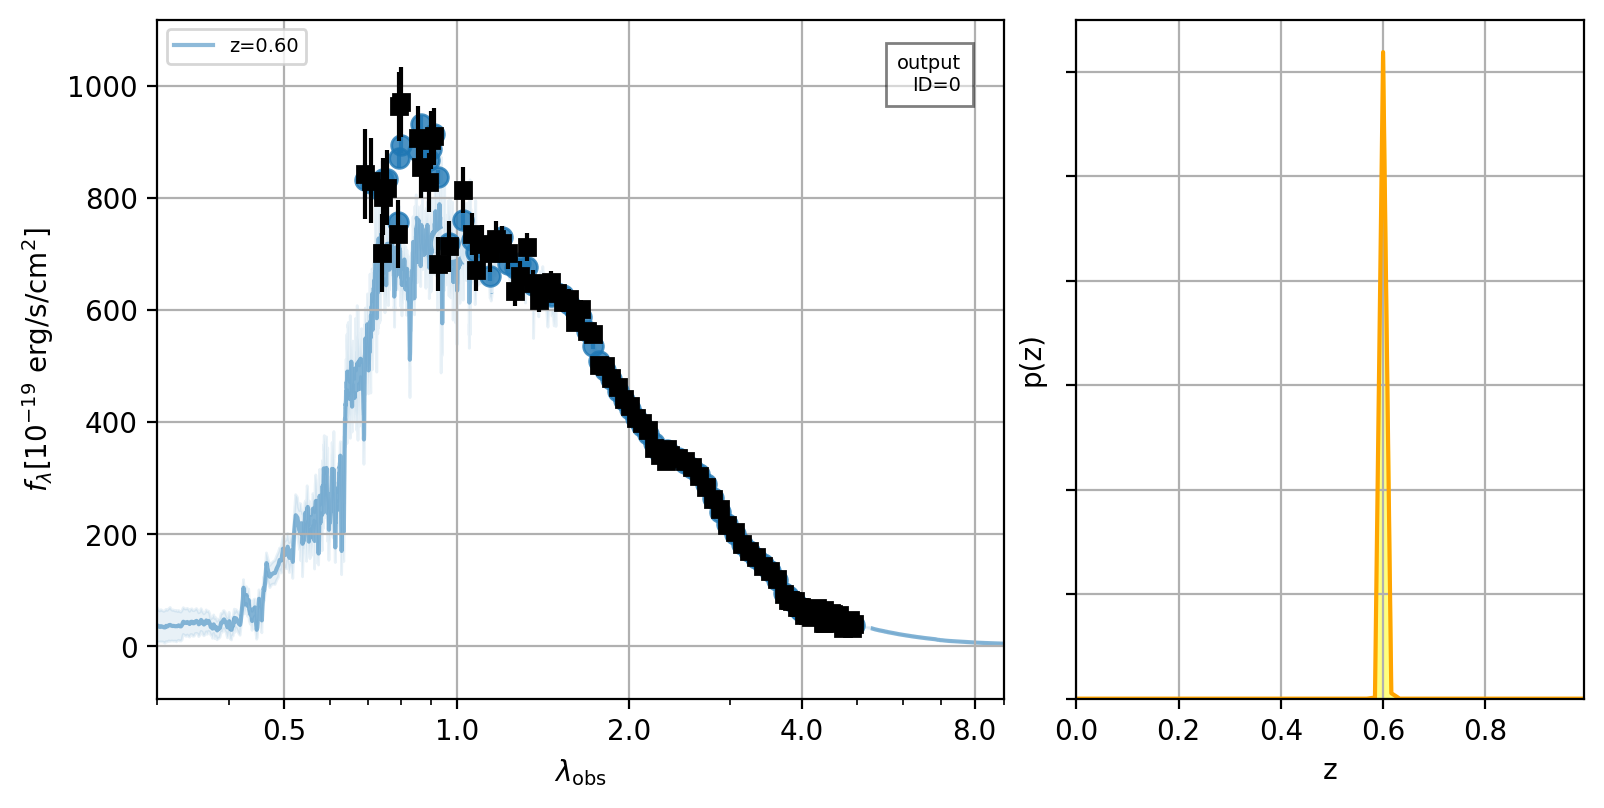

In [5]:
ez = eazy.photoz.PhotoZ(param_file=None, translate_file='test.translate', zeropoint_file=None, params=params)
ez.fit_catalog(ez.idx, n_proc=8)
with open('tempfilt.pickle', 'wb') as wfile:
   pickle.dump(ez.tempfilt, wfile, protocol=pickle.HIGHEST_PROTOCOL)
fig = ez.show_fit(id=0, savefig='fit.png')

In [9]:
with open('tempfilt.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)
ez = eazy.photoz.PhotoZ(param_file=None, translate_file='test.translate', zeropoint_file=None, params=params, tempfilt=tempfilt, )
ez.fit_catalog(ez.idx, n_proc=8)

Read default param file: /opt/anaconda3/envs/native/lib/python3.12/site-packages/eazy/data/zphot.param.default


Read CATALOG_FILE: test_synphot_all.dat
   >>> NOBJ = 4
F1C01 E1C01 (  1): Band1_1
F1C02 E1C02 (  2): Band1_2
F1C03 E1C03 (  3): Band1_3
F1C04 E1C04 (  4): Band1_4
F1C05 E1C05 (  5): Band1_5
F1C06 E1C06 (  6): Band1_6
F1C07 E1C07 (  7): Band1_7
F1C08 E1C08 (  8): Band1_8
F1C09 E1C09 (  9): Band1_9
F1C10 E1C10 ( 10): Band1_10
F1C11 E1C11 ( 11): Band1_11
F1C12 E1C12 ( 12): Band1_12
F1C13 E1C13 ( 13): Band1_13
F1C14 E1C14 ( 14): Band1_14
F1C15 E1C15 ( 15): Band1_15
F1C16 E1C16 ( 16): Band1_16
F1C17 E1C17 ( 17): Band1_17
F2C01 E2C01 ( 18): Band2_1
F2C02 E2C02 ( 19): Band2_2
F2C03 E2C03 ( 20): Band2_3
F2C04 E2C04 ( 21): Band2_4
F2C05 E2C05 ( 22): Band2_5
F2C06 E2C06 ( 23): Band2_6
F2C07 E2C07 ( 24): Band2_7
F2C08 E2C08 ( 25): Band2_8
F2C09 E2C09 ( 26): Band2_9
F2C10 E2C10 ( 27): Band2_10
F2C11 E2C11 ( 28): Band2_11
F2C12 E2C12 ( 29): Band2_12
F2C13 E2C13 ( 30): Band2_13
F2C14 E2C14 ( 31): Band2_14
F2C15 E2C15 ( 32): Band2_15
F2C16 E2C16 ( 33): Band2_16
F2C17 E2C17 ( 34): Band2_17
F3C01 E3C0

70it [00:00, 37923.18it/s]
100%|██████████| 70/70 [00:01<00:00, 62.76it/s]

Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=4)
Fit 1.2 s (n_proc=8, NOBJ=4)


/opt/anaconda3/envs/native/lib/python3.12/site-packages/eazy/photoz.py:6144: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  draws = np.random.multivariate_normal((coeffs_i*An)[ok_temp],
/opt/anaconda3/envs/native/lib/python3.12/site-packages/eazy/photoz.py:6144: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  draws = np.random.multivariate_normal((coeffs_i*An)[ok_temp],


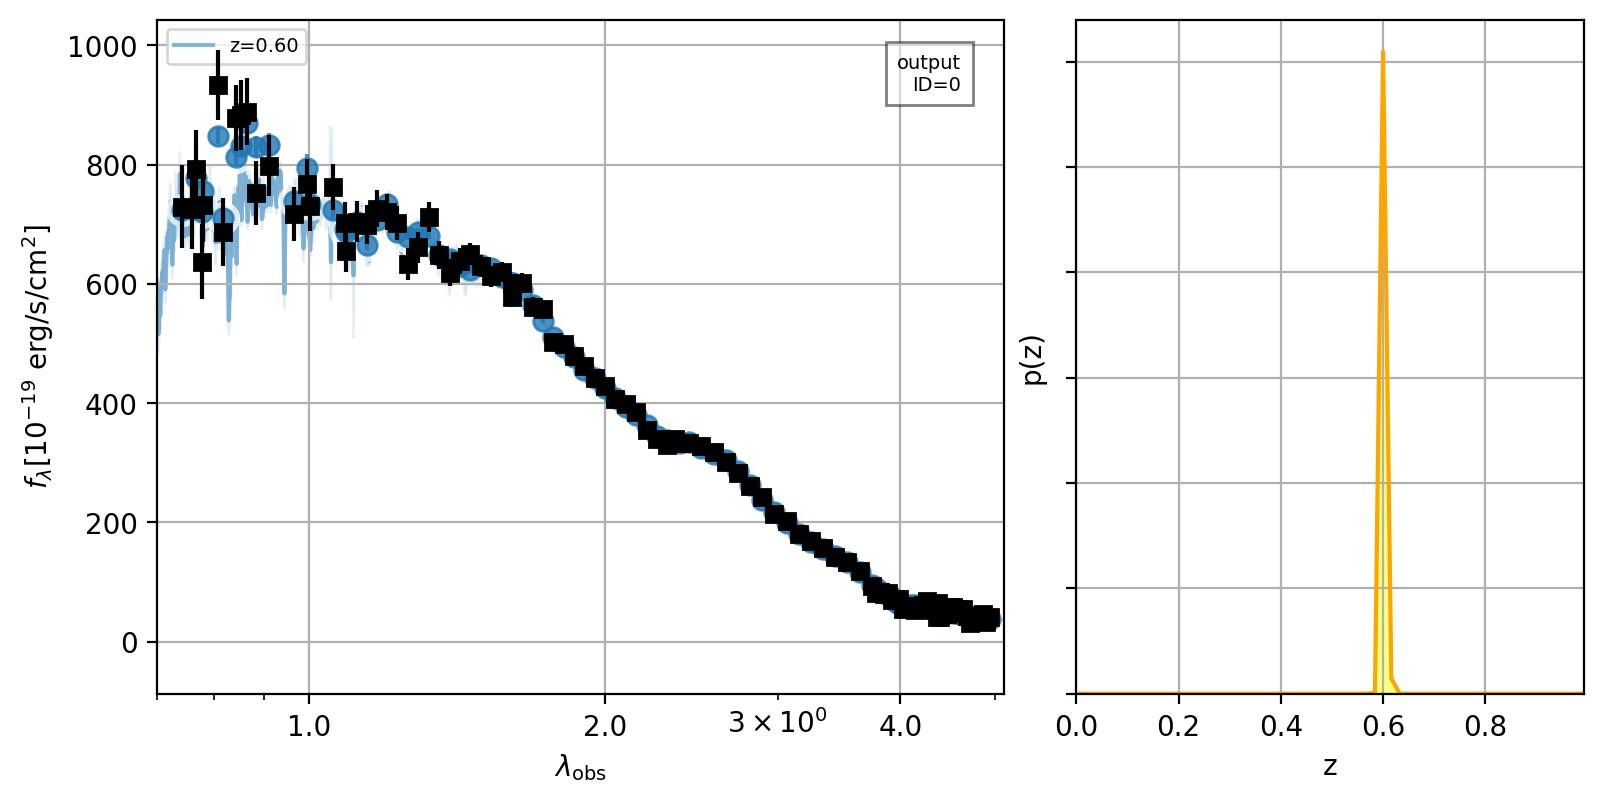

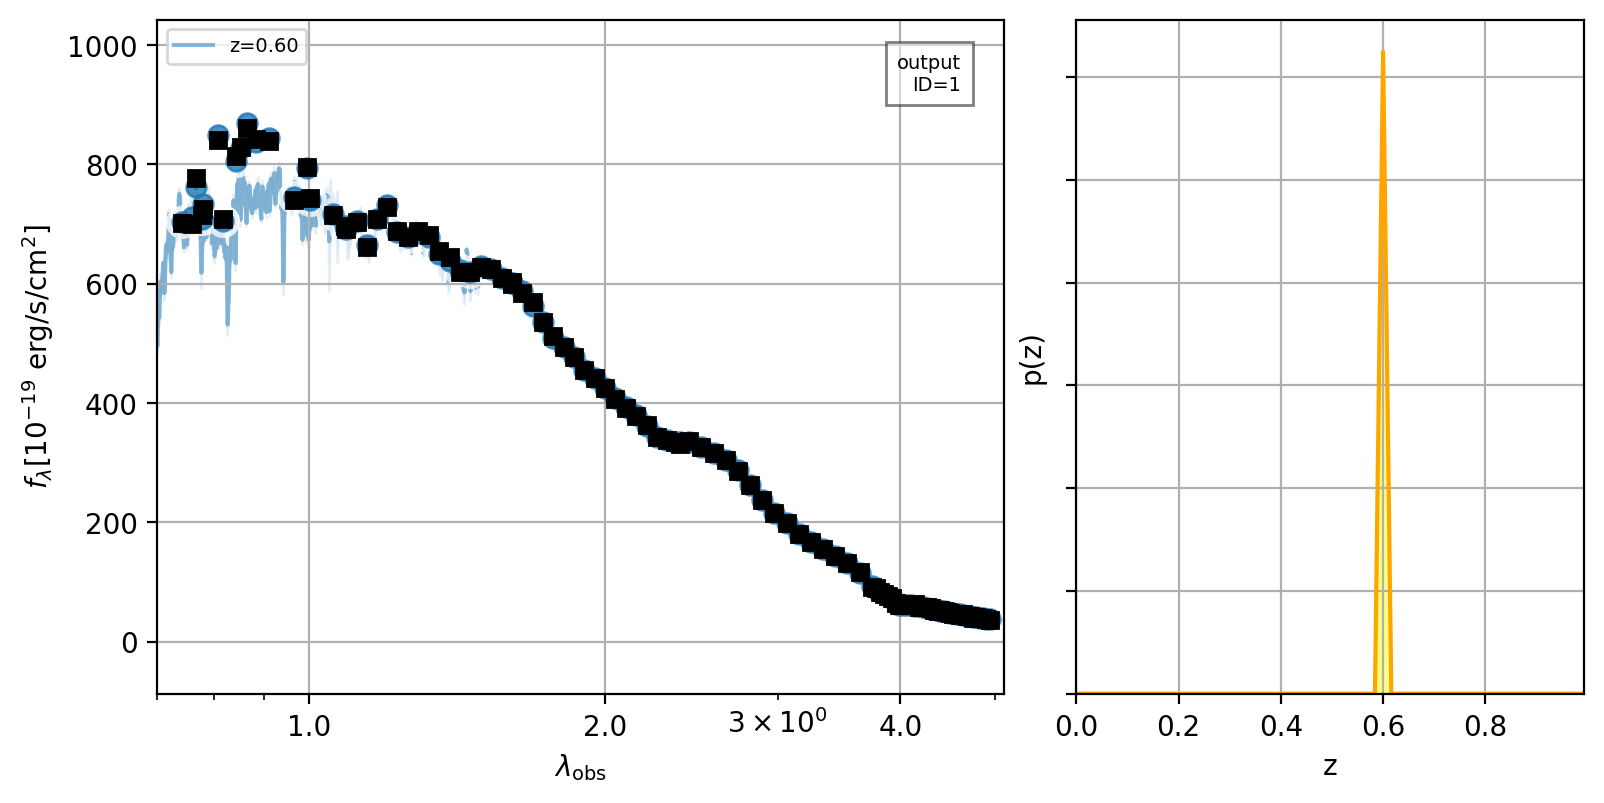

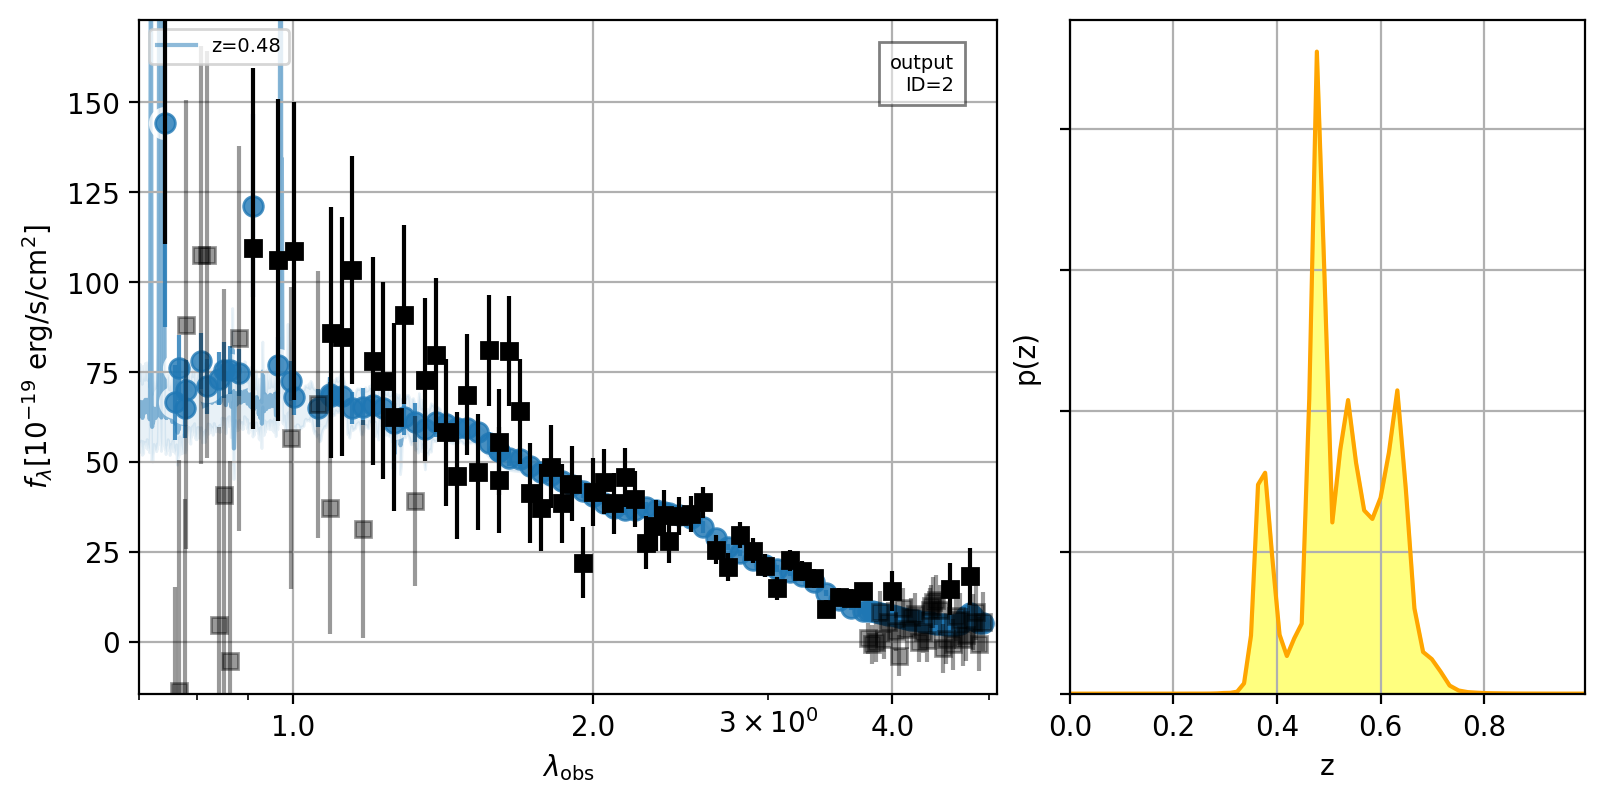

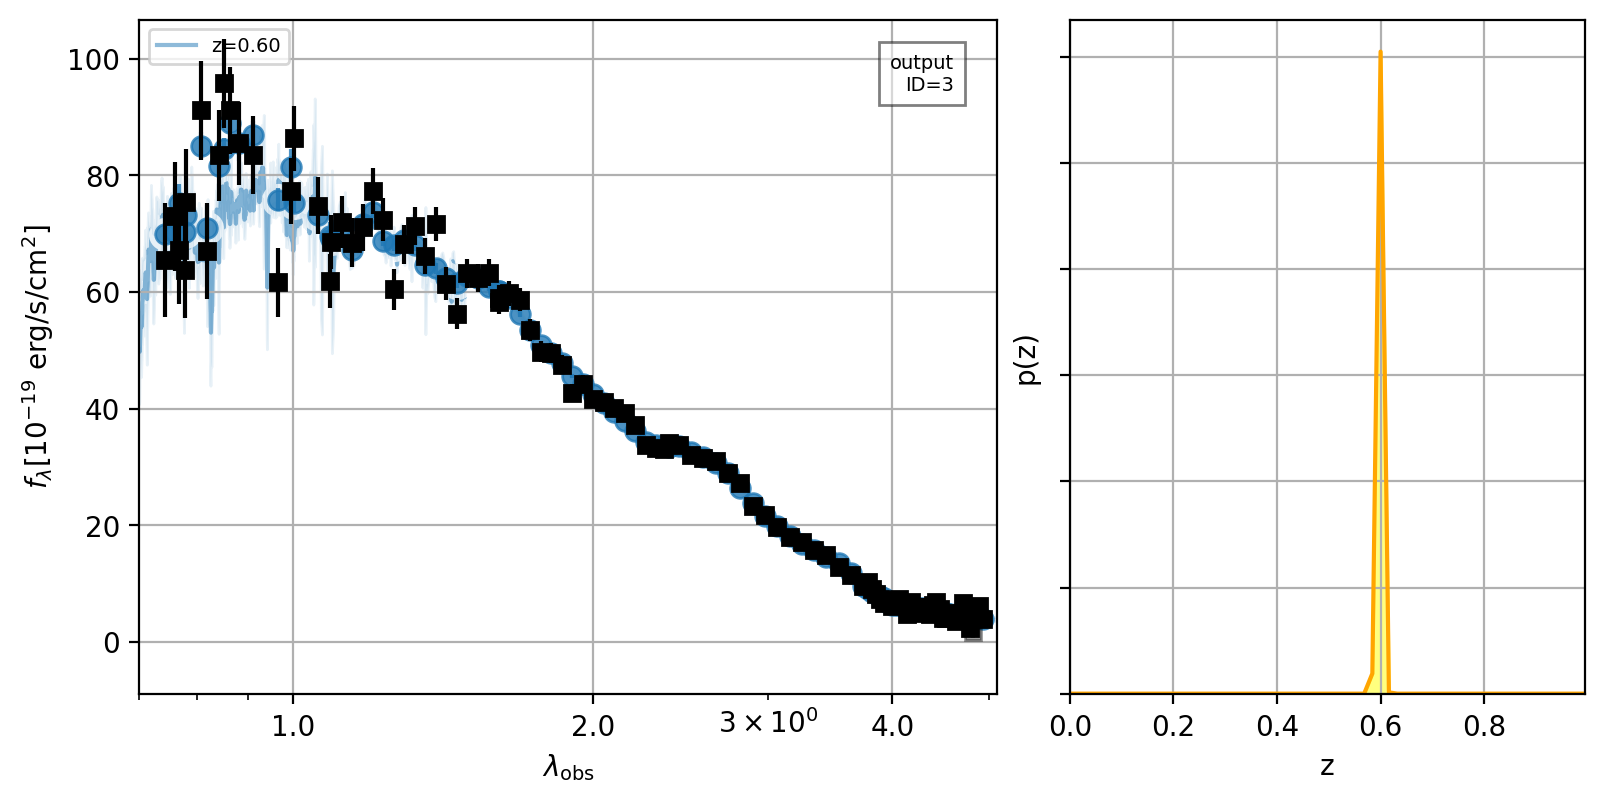

In [10]:
fig = ez.show_fit(0, xlim=[0.7, 5.1])
fig = ez.show_fit(1, xlim=[0.7, 5.1])
fig = ez.show_fit(2, xlim=[0.7, 5.1])
fig = ez.show_fit(3, xlim=[0.7, 5.1])

In [11]:
import numpy as np

def kasi_fit_object(ez, iobj=0, z=0):
    """
    Fit on the redshift grid
    """
    from scipy.optimize import nnls
    #import np.linalg
                
    fnu_i = ez.fnu[iobj, :]*ez.ext_redden
    efnu_i = ez.efnu[iobj,:]*ez.ext_redden
    ok_band = (fnu_i > ez.param['NOT_OBS_THRESHOLD']) & (efnu_i > 0)
        
    A = ez.tempfilt(z)
    var = (0.0*fnu_i)**2 + efnu_i**2 + (ez.TEF(z)*fnu_i)**2
        
    chi2 = np.zeros(ez.NZ, dtype=ez.ARRAY_DTYPE)
    coeffs = np.zeros((ez.NZ, ez.NTEMP), dtype=ez.ARRAY_DTYPE)
        
    for iz in range(ez.NZ):
        A = ez.tempfilt(ez.zgrid[iz])
        var = (0.0*fnu_i)**2 + efnu_i**2 + (ez.TEF(ez.zgrid[iz])*fnu_i)**2
        rms = np.sqrt(var)
            
        ok_temp = (np.sum(A, axis=1) > 0)
        if ok_temp.sum() == 0:
            chi2[iz] = np.inf
            coeffs[iz, :] = 0.
            continue
                
        try:
            coeffs_x, rnorm = nnls((A/rms).T[ok_band,:][:,ok_temp], (fnu_i/rms)[ok_band])
            coeffs_i = np.zeros(A.shape[0], dtype=ez.ARRAY_DTYPE)
            coeffs_i[ok_temp] = coeffs_x
        except:
            coeffs_i = np.zeros(A.shape[0], dtype=ez.ARRAY_DTYPE)
                
        fmodel = np.dot(coeffs_i, A)
        chi2[iz] = np.sum((fnu_i-fmodel)**2/var*ok_band)
        coeffs[iz, :] = coeffs_i
    
    
    
        
    return iobj, chi2, coeffs, fmodel

def kasi_compute_lnp(ez, prior=False, beta_prior=False, clip_wavelength=1100, in_place=True):

    import time
        
    has_chi2 = (ez.chi2_fit != 0).sum(axis=1) > 0 
    #min_chi2 = ez.chi2_fit[has_chi2,:].min(axis=1)
        
    loglike = -ez.chi2_fit[has_chi2,:]/2.
    #pz = np.exp(-(ez.chi2_fit[has_chi2,:].T-min_chi2)/2.).T
        
    if ez.param['VERBOSITY'] >= 2:
        print('compute_lnp ({0})'.format(time.ctime()))
            
    if hasattr(ez, 'tef_lnp'):
        if ez.param['VERBOSITY'] >= 2:
            print(' ... tef_lnp')
            
        loglike += ez.tef_lnp[has_chi2,:]
            
    if prior:
        if ez.param['VERBOSITY'] >= 2:
            print(' ... full_logprior')
            
        loglike += ez.full_logprior[has_chi2,:]
        
    if clip_wavelength is not None:
        # Set pz=0 at redshifts where clip_wavelength beyond reddest 
        # filter
        clip_wz = clip_wavelength*(1+ez.zgrid)
        red_mask = (clip_wz[:,None] > ez.lc_reddest[None, has_chi2]).T
            
        loglike[red_mask] = -np.inf
        ez.lc_zmax = ez.lc_reddest/clip_wavelength - 1
        ez.clip_wavelength = clip_wavelength
            
    if beta_prior:
        if ez.param['VERBOSITY'] >= 2:
            print(' ... beta lnp_beta')
                
        p_beta = ez.prior_beta(w1=1350, w2=1800, sample=has_chi2)
        ez.lnp_beta[has_chi2,:] = np.log(p_beta)
        ez.lnp_beta[~np.isfinite(ez.lnp_beta)] = -np.inf
        loglike += ez.lnp_beta[has_chi2,:]
        
    # Optional extra prior
    if hasattr(ez, 'extra_lnp'):
        loglike += ez.extra_lnp[has_chi2,:]
            
    loglike[~np.isfinite(loglike)] = -1e20
        
        
    lnpmax = loglike.max(axis=1)
    pz = np.exp(loglike.T - lnpmax).T
    log_norm = np.log(pz.dot(ez.trdz))
        
    lnp = (loglike.T - lnpmax - log_norm).T
    #lnpmax = -log_norm
        
    lnp[~np.isfinite(lnp)] = -1e20
        
    if in_place:
        ez.lnp[has_chi2,:] = lnp
        ez.lnpmax[has_chi2] = -log_norm
        
        ez.lnp_with_prior = prior
        ez.lnp_with_beta_prior = beta_prior
    else:
        return has_chi2, lnp, -log_norm
            
    del(lnpmax)
    del(pz)
    del(log_norm)
    del(loglike)
    del(lnp)

def kasi_compute_lnp_object(idx_fit,in_chi2_fit_object,ez, prior=False, beta_prior=False, clip_wavelength=1100):
    '''
    The main issue : `idx_fit` was an 1 dim array in the original code. 
    In this modding code, it should a single value, not an array. 
    Hence, for the compatibility, each single value should be wrapped as a one-element 1 D array, 
    such as [0] instead of 0. 
    
    So.. loglike should be wrapped as loglike[None,:] to forcefully make it as a multi-dim array.
    
    The final output also should lower the array dimension such as lnp[0] and lnpmax[0] from 2d to 1d. 
    '''
    
    import time
    
    has_chi2 = idx_fit # now this func will fit each object
    #has_chi2 = (ez.chi2_fit != 0).sum(axis=1) > 0 
    #min_chi2 = ez.chi2_fit[has_chi2,:].min(axis=1)
    
    loglike = -1.0*in_chi2_fit_object/2.
    #loglike = -ez.chi2_fit[has_chi2,:]/2.
    #pz = np.exp(-(ez.chi2_fit[has_chi2,:].T-min_chi2)/2.).T
        
    if ez.param['VERBOSITY'] >= 2:
        print('compute_lnp ({0})'.format(time.ctime()))
            
    if hasattr(ez, 'tef_lnp'):
        if ez.param['VERBOSITY'] >= 2:
            print(' ... tef_lnp')
            
        loglike += ez.tef_lnp[has_chi2,:]
            
    if prior:
        if ez.param['VERBOSITY'] >= 2:
            print(' ... full_logprior')
            
        loglike += ez.full_logprior[has_chi2,:]
        
    if clip_wavelength is not None:
        # Set pz=0 at redshifts where clip_wavelength beyond reddest 
        # filter
        clip_wz = clip_wavelength*(1+ez.zgrid)
        red_mask = (clip_wz[:,None] > ez.lc_reddest[None, has_chi2]).T
        
        ## potential "bug" 
        # for each object, red_mask should be a single-dim array. 
        #loglike[red_mask] = -np.inf
        loglike[red_mask[0]] = -np.inf
        ez.lc_zmax = ez.lc_reddest/clip_wavelength - 1
        ez.clip_wavelength = clip_wavelength
            
    if beta_prior:
        if ez.param['VERBOSITY'] >= 2:
            print(' ... beta lnp_beta')
                
        p_beta = ez.prior_beta(w1=1350, w2=1800, sample=has_chi2)
        ez.lnp_beta[has_chi2,:] = np.log(p_beta)
        ez.lnp_beta[~np.isfinite(ez.lnp_beta)] = -np.inf
        loglike += ez.lnp_beta[has_chi2,:]
        
    # Optional extra prior
    if hasattr(ez, 'extra_lnp'):
        loglike += ez.extra_lnp[has_chi2,:]
            
    loglike[~np.isfinite(loglike)] = -1e20
    
    #print("len(loglike.shape) = "+str(len(loglike.shape)))
    if len(loglike.shape) != 1:
        print("Something is wrong in kasi_compute_lnp_object.")
        print("len(loglike.shape) = "+str(len(loglike.shape)))

    lnpmax = loglike[None,:].max(axis=1)
    pz = np.exp(loglike[None,:].T - lnpmax).T
    log_norm = np.log(pz.dot(ez.trdz))

    lnp = (loglike[None,:].T - lnpmax - log_norm).T
    lnp[~np.isfinite(lnp)] = -1e20
        

    #return has_chi2, lnp, -log_norm
    return has_chi2, lnp[0], -log_norm[0]
    
    del(lnpmax)
    del(pz)
    del(log_norm)
    del(loglike)
    del(lnp)

def kasi_get_redshift_object(idx_fit, ez, templnp, templnpmax, get_best_fit=True, prior=True, beta_prior=True, clip_wavelength=1100):
        """Fit parabola to ``lnp`` to get best maximum
        
        """
        #from scipy import polyfit, polyval
        from numpy import polyfit, polyval
        
        '''
        # for `chi2` values for `zgrid`
        idummy, tempchi, tempcoeff, tempfmodel = \
        kasi_fit_object(ez,iobj=idx_fit,z=0)
        
        idummy2, templnp, templnpmax = \
        kasi_compute_lnp_object(idx_fit,tempchi,ez, prior=prior, \
                                beta_prior=beta_prior, clip_wavelength=clip_wavelength):
        '''
        #instead of the above, we only need `templnp` and `templnpmax` 
        # Hence, we add two arguments of `templnp` and `templnpmax` to the function.
 
 
        #self.compute_lnp(prior=prior, beta_prior=beta_prior, 
        #                 clip_wavelength=clip_wavelength)
        
        
        # A single object, idx_fit, for z-fit
        #has_chi2 = idx_fit        
        # Objects that have been fit
        #has_chi2 = (self.chi2_fit != 0).sum(axis=1) > 0 
                                   
        #izbest0 = np.argmin(self.chi2_fit, axis=1)
        #izmax = np.argmax(self.lnp, axis=1)*has_chi2
        izmax = np.argmax(templnp)
        
        
        # Default return-values when Fit is not Possible
        zbest = ez.zgrid[izmax]
        lnpmax = templnpmax
        
        isFit = (izmax > 0) & (izmax < ez.NZ-2) # for parabola fit, we need 4 points at izmax-1, ... , izmax+2
        #mask = (izmax > 0) & (izmax < self.NZ-1) & has_chi2 # Old mask
        
        if isFit & get_best_fit:
            c = polyfit(ez.zgrid[izmax-1:izmax+2], templnp[izmax-1:izmax+2], 2)
            zbest = -c[1]/(2*c[0])
            lnpmax = polyval(c, zbest)
        # for iobj in self.idx[mask]:
        #     iz = izmax[iobj]
        #     
        #     c = polyfit(self.zgrid[iz-1:iz+2], self.lnp[iobj, iz-1:iz+2], 2)
        #     
        #     zbest[iobj] = -c[1]/(2*c[0])
        #     lnpmax[iobj] = polyval(c, zbest[iobj])
        
        '''
        #####
        # Analytic parabola fit
        iz_ = izmax[self.idx[mask]]
        
        _x = np.array([self.zgrid[iz-1:iz+2] for iz in iz_])
        _y = np.array([self.lnp[iobj, iz-1:iz+2] 
                       for iz, iobj in zip(iz_, self.idx[mask])])

        dx = np.diff(_x, axis=1).T
        dx2 = np.diff(_x**2, axis=1).T
        dy = np.diff(_y, axis=1).T

        c2 = (dy[1]/dx[1] - dy[0]/dx[0]) / (dx2[1]/dx[1] - dx2[0]/dx[0])
        c1 = (dy[0] - c2 * dx2[0])/dx[0]
        c0 = _y.T[0] - c1*_x.T[0] - c2*_x.T[0]**2
        
        _m = self.idx[mask]
        zbest[_m] = -c1/2/c2
        lnpmax[_m] = c2*zbest[_m]**2+c1*zbest[_m]+c0
        
        
        del(_x)
        del(_y)
        del(iz_)
        del(dx)
        del(dx2)
        del(dy)
        del(c2)
        del(c1)
        del(c0)
        del(_m)
        '''
        
        return zbest, lnpmax

def kasi_wrapper_fit_each_object(idx_fit, ez, get_best_fit=True, prior=False, beta_prior=False, \
                                 clip_wavelength=1100,fitter='nnls'):

    import numpy as np
    #import matplotlib.pyplot as plt
    #import time
    #import multiprocessing as mp


    fnu_corr = ez.fnu[idx_fit,:]*ez.ext_redden*ez.zp
    efnu_corr = ez.efnu[idx_fit,:]*ez.ext_redden*ez.zp
    
            
    efnu_corr[ez.fnu[idx_fit,:] < ez.param['NOT_OBS_THRESHOLD']] = ez.param['NOT_OBS_THRESHOLD'] - 9.
    #t0 = time.time()

    idummy, tempchi, tempcoeff, tempfmodel = kasi_fit_object(ez,iobj=idx_fit,z=0)
    #print("idummy ="+str(idummy))
    
    
    ''' We should avoid updating ez.DATAFIELDs to broad-cast `ez`. `ez` should only have setting parameters, not calculated results 
    ez.chi2_fit[idx_fit,:] = tempchi
    ez.fit_coeffs[idx_fit,:] = tempcoeff
    ez.fmodel[idx_fit,:] = tempfmodel
    kasi_compute_lnp(ez,prior=prior, beta_prior=beta_prior, in_place=True)
    '''

    # now, templnp is an 1d array and templnpmax is a scalar
    idummy2, templnp, templnpmax = kasi_compute_lnp_object(idx_fit,tempchi,ez, prior=prior, \
                                                           beta_prior=beta_prior, clip_wavelength=clip_wavelength)
    
    # Fit the z-best using Parabola function
    zbest, lnpmaxbest = kasi_get_redshift_object(idx_fit, ez, templnp, templnpmax,get_best_fit=get_best_fit, prior=prior, \
                                          beta_prior=beta_prior, clip_wavelength=clip_wavelength)
    
    #t1 = time.time()
    
    return [zbest,tempfmodel.tolist()]

def kasi_wrapper_fit_each_object_show_new(idx_fit, ez, outfile=False, showplot=True, verbose=False, get_best_fit=True, \
                                          prior=False, beta_prior=False, \
                                          clip_wavelength=1100,fitter='nnls'):

    import numpy as np
    #import matplotlib.pyplot as plt
    import time
    #import multiprocessing as mp
    from collections import OrderedDict
    from eazy.photoz import template_lsq
    from eazy.photoz import utils
    from eazy.photoz import igm_module
    import astropy.units as u
    from scipy.integrate import cumtrapz
    
    import matplotlib.pyplot as plt
    from matplotlib.gridspec import GridSpec
    

    # plot settings
    #plt.rc('font', family='serif') 
    #plt.rc('font', serif='Times New Roman') 
    plt.rcParams.update({'font.size': 16})
    plt.rcParams['mathtext.fontset'] = 'stix'
    
    
    # nearest, interp
    TEMPLATE_REDSHIFT_TYPE = 'nearest'
    IGM_OBJECT = igm_module.Inoue14()

    

    fnu_corr = ez.fnu[idx_fit,:]*ez.ext_redden*ez.zp
    efnu_corr = ez.efnu[idx_fit,:]*ez.ext_redden*ez.zp
            
    efnu_corr[ez.fnu[idx_fit,:] < ez.param['NOT_OBS_THRESHOLD']] = ez.param['NOT_OBS_THRESHOLD'] - 9.
    
    #variables for show : SED 
    fnu_show = np.squeeze(ez.fnu[idx_fit,:])*ez.ext_redden*ez.zp
    efnu_show = np.squeeze(ez.efnu[idx_fit,:])*ez.ext_redden*ez.zp
    ok_band_show = (fnu_show/ez.zp > ez.param['NOT_OBS_THRESHOLD'])
    ok_band_show &= (efnu_show/ez.zp > 0)
    efnu_show[~ok_band_show] = ez.param['NOT_OBS_THRESHOLD'] - 9.
    zspec_show = ez.ZSPEC[idx_fit]
    
    log_prior_show = ez.full_logprior[idx_fit,:].flatten()
    
    #print("ix: ",idx_fit)
    #print("id: ",ez.OBJID[idx_fit])
    #print("fnu: ",fnu_show)
    #print("efnu: ",efnu_show)
    #print("ok_band: ",ok_band_show)
    #print("zspec: ",zspec_show)
    
    t0 = time.time()

    idummy, tempchi, tempcoeff, tempfmodel = kasi_fit_object(ez,iobj=idx_fit,z=0)
    #print("idummy ="+str(idummy))
    
    
    ''' We should avoid updating ez.DATAFIELDs to broad-cast `ez`. `ez` should only have setting parameters, not calculated results 
    ez.chi2_fit[idx_fit,:] = tempchi
    ez.fit_coeffs[idx_fit,:] = tempcoeff
    ez.fmodel[idx_fit,:] = tempfmodel
    kasi_compute_lnp(ez,prior=prior, beta_prior=beta_prior, in_place=True)
    '''

    # now, templnp is an 1d array and templnpmax is a scalar
    idummy2, templnp, templnpmax = kasi_compute_lnp_object(idx_fit,tempchi,ez, prior=prior, \
                                                           beta_prior=beta_prior, clip_wavelength=clip_wavelength)
    
    # Fit the z-best using Parabola function
    zbest, lnpmaxbest = kasi_get_redshift_object(idx_fit, ez, templnp, templnpmax,get_best_fit=get_best_fit, prior=prior, \
                                          beta_prior=beta_prior, clip_wavelength=clip_wavelength)
    
    t1 = time.time()
    
    if verbose:
        print('>>Fitting time: {0:.3f} s '.format(t1-t0))
        '''
        print('>>idx_fit: '+str(idx_fit)+' lnpmax: '+str(ez.lnpmax[idx_fit]))
        '''
        print('>>idx_fit: '+str(idx_fit)+', zbest: '+str(zbest)+', lnpmax: '+str(lnpmaxbest))
    
    #variables for show : Coeffs at zbest
    ndraws = ez.NDRAWS
    tef_show = ez.TEF(zbest)
    A = np.squeeze(ez.tempfilt(zbest))
    chi2_show, coeffs_show, fmodel, draws = template_lsq(fnu_show, efnu_show, A, \
                                                         tef_show, ez.zp, ndraws, fitter='nnls')
    #print("ndraws: ",ndraws)
    #print("tef: ",tef_show)
    #print("chi2: ",chi2_show)
    #print("coeffs: ",coeffs_show)
    #print("fmodel: ",fmodel)
    #print("draws: ",draws)
    
    
    if draws is None:
        efmodel = 0
    else:
        efmodel = np.percentile(np.dot(draws, A), [16,84], axis=0)
        efmodel = np.squeeze(np.diff(efmodel, axis=0)/2.)
    
    #print("efmodel",efmodel)
    
    #variables for show : Full SED
    templ = ez.templates[0]
    tempflux = np.zeros((ez.NTEMP, templ.wave.shape[0]),dtype=ez.ARRAY_DTYPE)
    
    
    for i in range(ez.NTEMP):
        zargs = {'z':zbest, 'redshift_type':TEMPLATE_REDSHIFT_TYPE}
        fnu = ez.templates[i].flux_fnu(**zargs)*ez.tempfilt.scale[i]
    try:
        tempflux[i, :] = fnu
    except:
        tempflux[i, :] = np.interp(templ.wave,ez.templates[i].wave, fnu)
    
    
    templz = templ.wave*(1+zbest)
    
    if ez.tempfilt.add_igm:
        igmz = templ.wave*0.+1
        lyman = templ.wave < 1300
        igmz[lyman] = IGM_OBJECT.full_IGM(zbest, templz[lyman])
    else:
        igmz = 1.
    templf = np.dot(coeffs_show, tempflux)*igmz
    
    if draws is not None:
        templf_draws = np.dot(draws, tempflux)*igmz
    
    fnu_factor = 10**(-0.4*(ez.param['PRIOR_ABZP']+48.6))
    
    
    templz_power = -2
    flam_spec = utils.CLIGHT*1.e10/templz**2/1.e-19
    flam_sed = utils.CLIGHT*1.e10/ez.pivot**2/ez.ext_corr/1.e-19
    ylabel = (r'$f_\lambda [10^{-19}$ erg/s/cm$^2$]')
    flux_unit = 1.e-19*u.erg/u.s/u.cm**2/u.AA
    
    #print("tempflux: ",tempflux)
    #print("igmz: ",igmz)
    
    
    
    try:
        showdata = OrderedDict(ix=idx_fit,idobj=ez.OBJID[idx_fit], zbest=zbest, \
                               z_spec=zspec_show, pivot=ez.pivot, \
                               model=fmodel*fnu_factor*flam_sed, \
                               emodel=efmodel*fnu_factor*flam_sed, \
                               fobs=fnu_show*fnu_factor*flam_sed, \
                               efobs=efnu_show*fnu_factor*flam_sed, \
                               valid=ok_band_show, \
                               tef=tef_show, \
                               templz=templz, \
                               templf=templf*fnu_factor*flam_spec, \
                               flux_unit=flux_unit, \
                               wave_unit=u.AA, \
                               chi2=chi2_show, coeffs=coeffs_show)
    except:
        showdata = None
    
    
    print(">>Valid Bands: ",showdata['valid'])
    print(">>NumValid Bands: ",np.sum(showdata['valid']))
    
    ###### Make the plot
    axes=None
    figsize=[12,12]
    showpz=0.4
    template_color='#1f77b4'
    snr_thresh=2.
    with_tef=True
    show_upperlimits=True
    show_components=True
    show_redshift_draws=200
    draws_cmap=None
    if showplot:

        if axes is None:
            fig = plt.figure(figsize=figsize)
            if showpz:
                fig_axes = GridSpec(2,1,height_ratios=[1,showpz])
            else:    
                fig_axes = GridSpec(1,1,height_ratios=[1])
                
            ax = fig.add_subplot(fig_axes[0])
        else:
            fig = None
            fig_axes = None
            ax = axes[0]
                        
        ax.scatter(showdata['pivot']/1.e4, fmodel*fnu_factor*flam_sed, 
                   color='w', label=None, zorder=1, s=120, marker='o')
        
        ax.scatter(showdata['pivot']/1.e4, fmodel*fnu_factor*flam_sed, marker='x',
                  color=template_color, label=None, zorder=2, s=120, 
                  alpha=0.8)
        if draws is not None:
            ax.errorbar(showdata['pivot']/1.e4, fmodel*fnu_factor*flam_sed,
                        efmodel*fnu_factor*flam_sed, alpha=0.8,
                        color=template_color, zorder=2,
                        marker='None', linestyle='None', label=None)
            
        # Missing data
        missing = (fnu_show < ez.param['NOT_OBS_THRESHOLD']) 
        missing |= (efnu_show < 0)
        
        # Detection
        sn2_detection = (~missing) & (fnu_show/efnu_show > snr_thresh)
        
        # S/N < 2
        sn2_not = (~missing) & (fnu_show/efnu_show <= snr_thresh)
        
        # Uncertainty with TEF
        if with_tef:
            err_tef = np.sqrt(efnu_show**2+(tef_show*fnu_show)**2)            
        else:
            err_tef = efnu_show*1
            
        ax.errorbar(ez.pivot[sn2_detection]/1.e4, 
                    (fnu_show*fnu_factor*flam_sed)[sn2_detection], 
                    (err_tef*fnu_factor*flam_sed)[sn2_detection], 
                    color='k', marker='s', linestyle='None', label=None, 
                    zorder=10)
        
        # show upper limits
        if show_upperlimits:
            ax.errorbar(ez.pivot[sn2_not]/1.e4, 
                        (fnu_show*fnu_factor*flam_sed)[sn2_not], 
                        (efnu_show*fnu_factor*flam_sed)[sn2_not], color='k', 
                        marker='s', alpha=0.4, linestyle='None', label=None)

        pl = ax.plot(templz/1.e4, templf*fnu_factor*flam_spec, alpha=0.5, 
                     zorder=-1, color=template_color, 
                     label='z={0:.2f}'.format(zbest))
        
        # show components
        if show_components:
            colors = ['#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
                      '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
            
            for i in range(ez.NTEMP):
                if coeffs_show[i] != 0:
                    pi = ax.plot(templz/1.e4, 
                        coeffs_show[i]*tempflux[i,:]*igmz*fnu_factor*flam_spec, 
                              alpha=0.5, zorder=-1, 
                              label=ez.templates[i].name.split('.dat')[0], 
                              color=colors[i % len(colors)])
                            
        if show_redshift_draws:
            
            if draws_cmap is None:
                draws_cmap = plt.cm.rainbow
                
            # Draw random values from p(z)
            pz = np.exp(templnp).flatten()
            pzcum = cumtrapz(pz, x=ez.zgrid)
            
            if show_redshift_draws == 1:
                nzdraw = 100
            else:
                nzdraw = show_redshift_draws*1
            
            rvs = np.random.rand(nzdraw)
            zdraws = np.interp(rvs, pzcum, ez.zgrid[1:])
            
            for zi in zdraws:
                Az = np.squeeze(ez.tempfilt(zi))
                chi2_zi, coeffs_zi, fmodelz, __ = template_lsq(fnu_show, efnu_show, 
                                                       Az, 
                                                       ez.TEF(zi), ez.zp, 
                                                       0, fitter='nnls')
                                                       
                c_i = np.interp(zi, ez.zgrid, np.arange(ez.NZ)/ez.NZ)
                
                templzi = templ.wave*(1+zi)
                if ez.tempfilt.add_igm:
                    igmz = templ.wave*0.+1
                    lyman = templ.wave < 1300
                    igmz[lyman] = IGM_OBJECT.full_IGM(zi, templzi[lyman])
                else:
                    igmz = 1.

                templfz = np.dot(coeffs_zi, tempflux)*igmz                
                templfz *=  flam_spec * (templz / templzi)**templz_power
                
                plz = ax.plot(templzi/1.e4, templfz*fnu_factor,
                             alpha=np.maximum(0.1, 1./nzdraw), 
                             zorder=-1, color=draws_cmap(c_i))
                
        if draws is not None:
            templf_width = np.percentile(templf_draws*fnu_factor*flam_spec, 
                                         [16,84], axis=0)
            ax.fill_between(templz/1.e4, templf_width[0,:], templf_width[1,:], 
                            color=pl[0].get_color(), alpha=0.1, label=None)
                
        # show x y labels 
        add_label=True
        FNTSIZE=20
        xlim=[0.3, 30]
        if axes is None:            
            ax.set_ylabel(ylabel)
            
            if sn2_detection.sum() > 0:
                ymax = (fmodel*fnu_factor*flam_sed)[sn2_detection].max()
            else:
                ymax = (fmodel*fnu_factor*flam_sed).max()
                        
            if np.isfinite(ymax):
                ax.set_ylim(-0.1*ymax, 1.2*ymax)

            ax.set_xlim(xlim)
            xt = np.array([0.1, 0.5, 1, 2, 4, 8, 24, 160, 500])*1.e4

            ax.semilogx()

            valid_ticks = (xt > xlim[0]*1.e4) & (xt < xlim[1]*1.e4)
            if valid_ticks.sum() > 0:
                xt = xt[valid_ticks]
                ax.set_xticks(xt/1.e4)
                ax.set_xticklabels(xt/1.e4)

            ax.set_xlabel(r'$\lambda_\mathrm{obs}$')
            ax.grid()
            
            if add_label:
                txt = '{0}\nID={1}'
                txt = txt.format(ez.param['MAIN_OUTPUT_FILE'], 
                                 showdata['idobj']) #, self.prior_mag_cat[ix])
                                 
                ax.text(0.95, 0.95, txt, ha='right', va='top', fontsize=FNTSIZE,
                        transform=ax.transAxes, 
                        bbox=dict(facecolor='w', alpha=0.5), zorder=10)
                
                ax.legend(fontsize=12, loc='center right')
        
                
        ## P(z)
        show_prior=False
        logpz=False
        zr=[0,6]
        zshow=zbest
        bool_pzlabels=False
        if not showpz:
            return fig, showdata
            
        if axes is not None:
            if len(axes) == 1:
                return fig, showdata
            else:
                ax = axes[1]
        else:
            ax = fig.add_subplot(fig_axes[1])
        
        chi2 = np.squeeze(chi2_show)
        prior = np.exp(log_prior_show)
        #pz = np.exp(-(chi2-chi2.min())/2.)*prior
        #pz /= np.trapz(pz, self.zgrid)
        pz = np.exp(templnp).flatten()
        
        ax.plot(ez.zgrid, pz, color='orange', label=None)
        if show_prior:
            ax.plot(ez.zgrid, prior/prior.max()*pz.max(), color='g',
                label='prior')
        
        ax.fill_between(ez.zgrid, pz, pz*0, color='yellow', alpha=0.5, 
                        label=None)
        if zspec_show > 0:
            ax.vlines(zspec_show, 1.e-5, pz.max()*1.05, color='r',
                      label='zspec={0:.3f}'.format(zspec_show))
        
        if zshow is not None:
            ax.vlines(zshow, 1.e-5, pz.max()*1.05, color=template_color, 
                      label='z={0:.3f}'.format(zshow), linestyles='dashed')
            
        if axes is None:
            ax.set_ylim(0,pz.max()*1.05)
            
            if logpz:
                ax.semilogy()
                ymax = np.minimum(ax.get_ylim()[1], 100)
                ax.set_ylim(1.e-3*ymax, 1.8*ymax)
                
            if zr is None:
                ax.set_xlim(0,ez.zgrid[-1])
            else:
                ax.set_xlim(zr)
                
            ax.set_xlabel('z'); ax.set_ylabel('p(z)')
            ax.grid()
            if not bool_pzlabels:
                ax.set_yticklabels([])
            
            fig_axes.tight_layout(fig, pad=0.5)
            
            if add_label & (zspec_show > 0):
                ax.legend(fontsize=7, loc='upper left')
        # Save or not
        if outfile:
            fig.savefig(outfile)
            currentdir = %pwd
            print(">>"+outfile+" is saved on your current dirctory: "+currentdir)
    
    
    
    return showdata

>>Fitting time: 0.076 s 
>>idx_fit: 0, zbest: 0.5999942, lnpmax: 4.1100416
>>Valid Bands:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
>>NumValid Bands:  102
>>sed-vis.png is saved on your current dirctory: /Users/hbahk/Research/spherex-photoz/spherex-challenge/test_realisticres


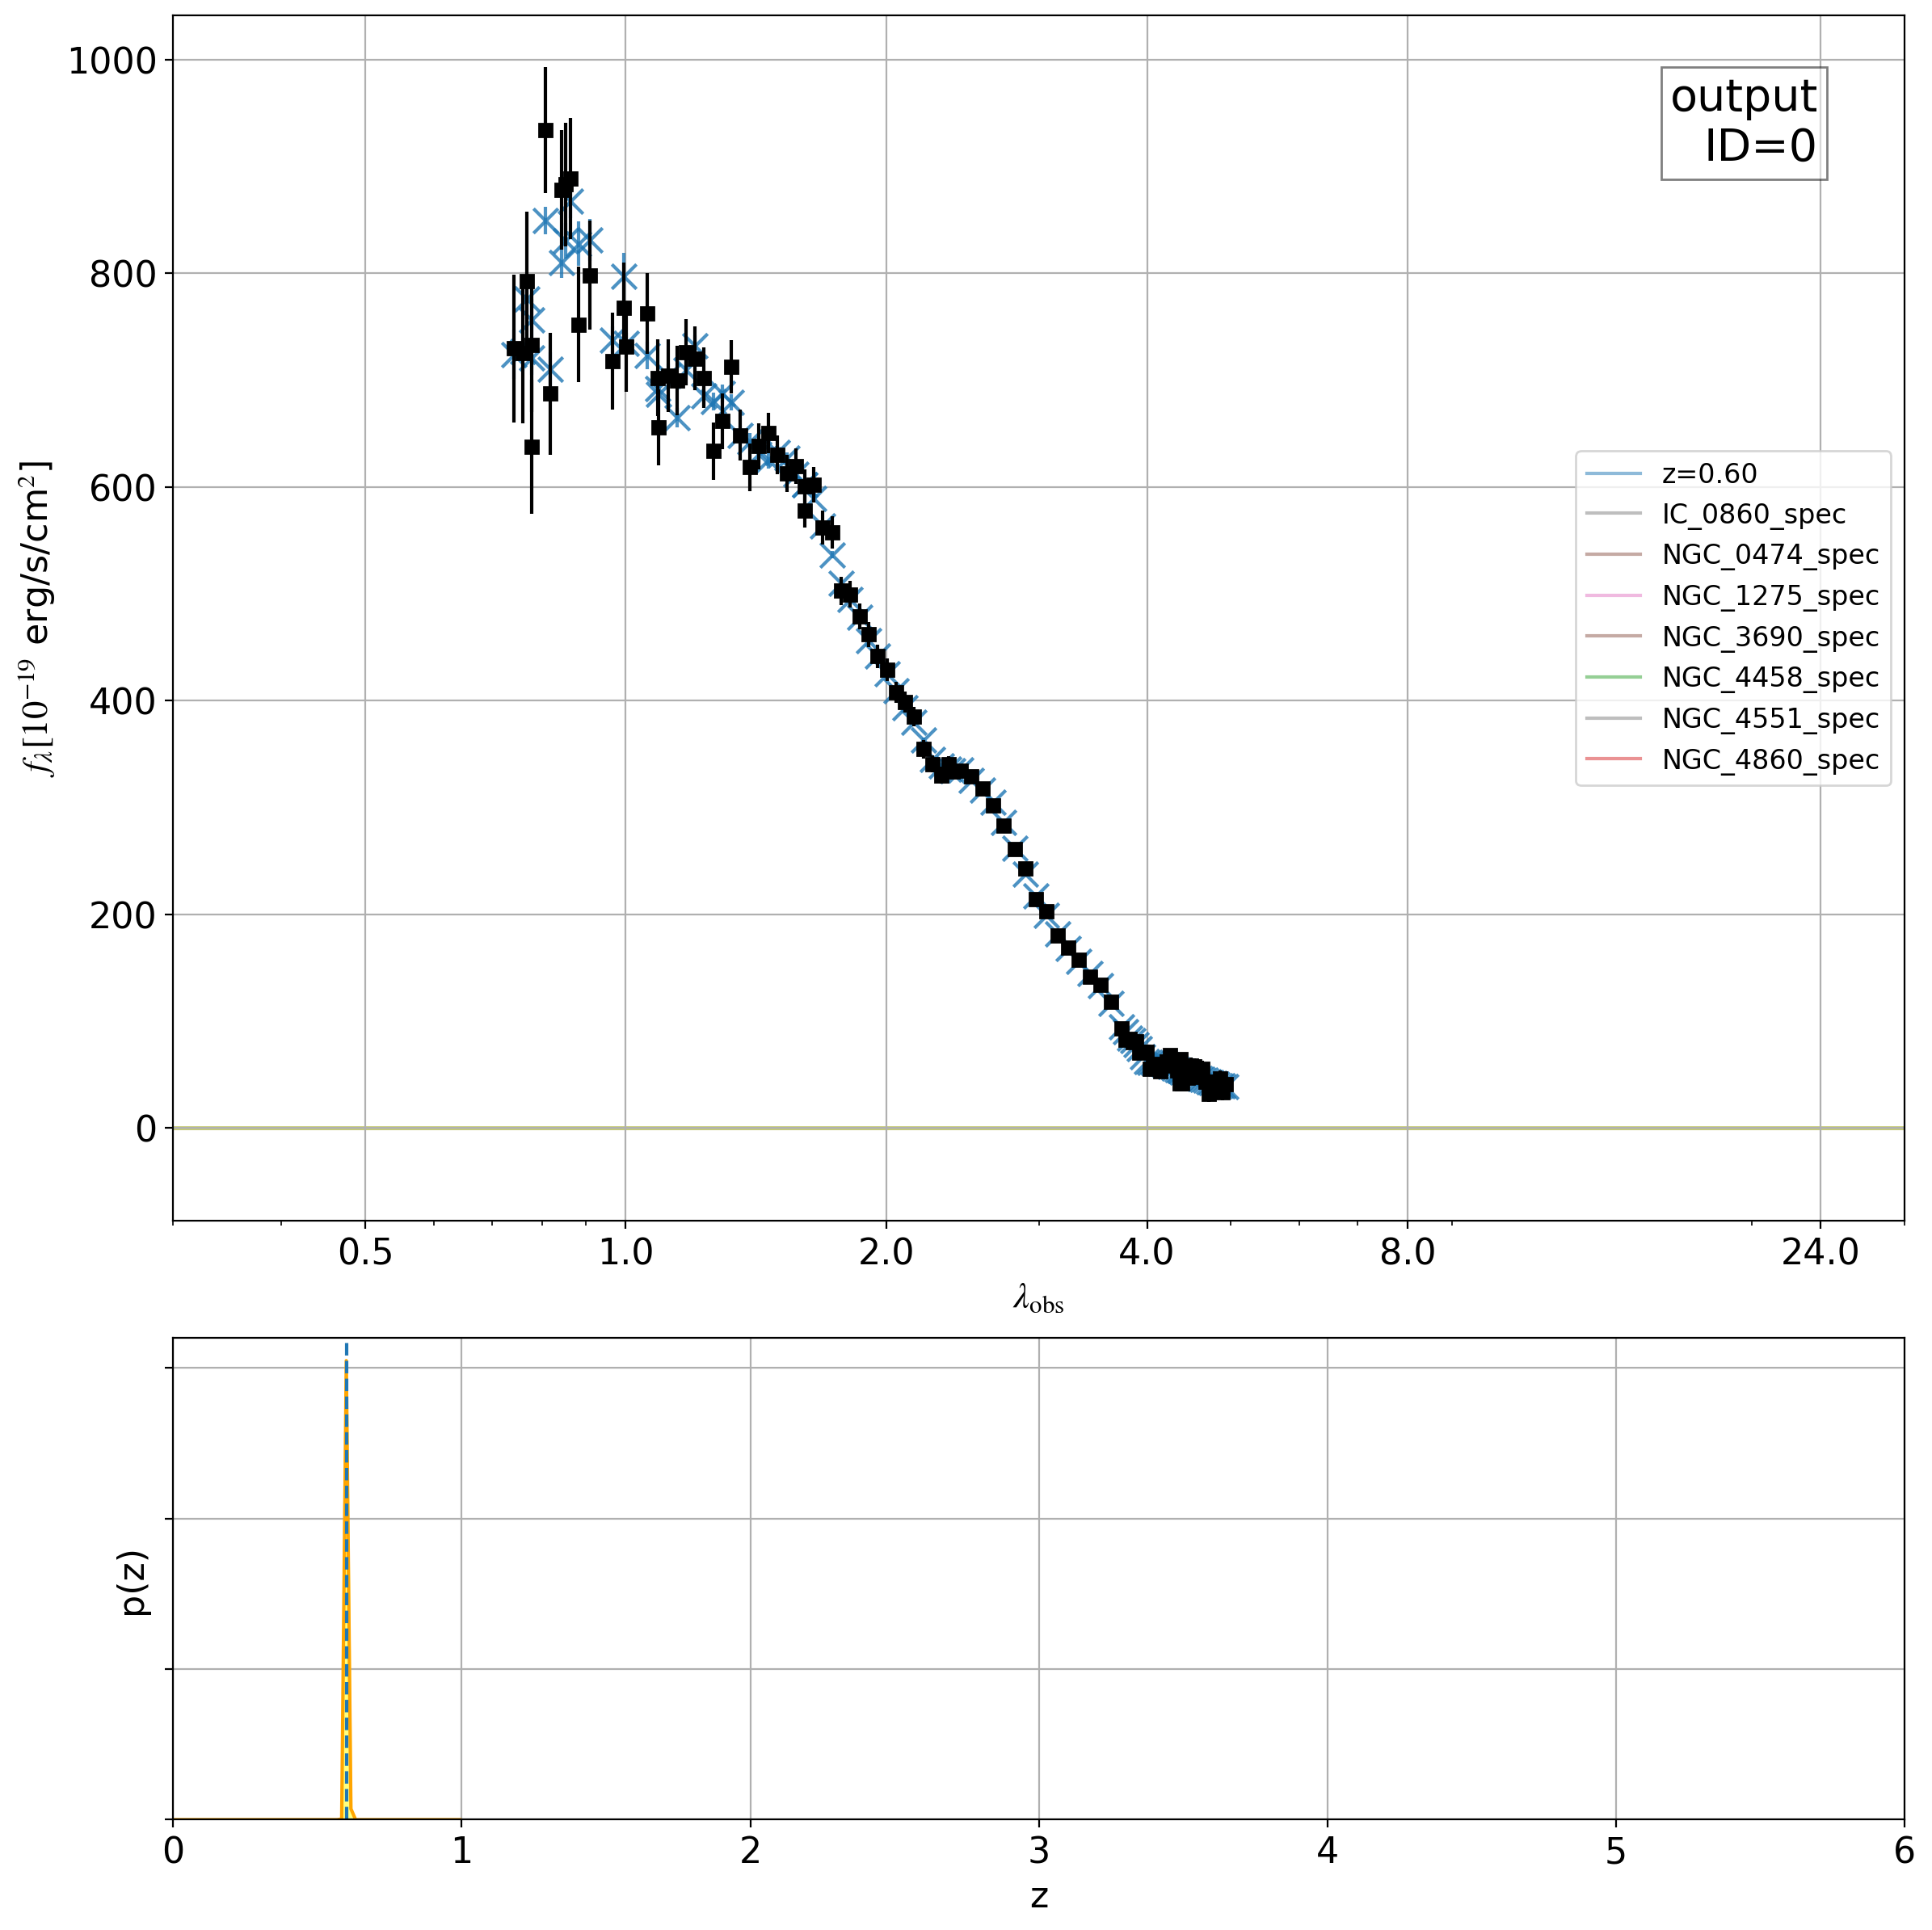

In [12]:
dummy = kasi_wrapper_fit_each_object_show_new(0, ez, outfile='sed-vis.png', verbose=True, get_best_fit=False, prior=True, beta_prior=False, fitter='nnls')

In [13]:
UBVJ = [103, 104, 105, 106]
RF_FILTERS = [116, 119,
              108, 109,
              110, 111, 112, 113, 114,
              106, 115, 107,]
NUVRK_FILTERS = [109, 112, 107]
ABSMAG_FILTERS = [117, 118, 119]
zout, hdu = ez.standard_output(prior=True, beta_prior=False, UBVJ=UBVJ, extra_rf_filters=RF_FILTERS,
                               absmag_filters=ABSMAG_FILTERS)

Get best fit coeffs & best redshifts
fit_best: 0.0 s (n_proc=1,  NOBJ=4)
Get parameters (UBVJ=[103, 104, 105, 106], simple=False)


/opt/anaconda3/envs/native/lib/python3.12/site-packages/eazy/photoz.py:6144: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  draws = np.random.multivariate_normal((coeffs_i*An)[ok_temp],
100%|██████████| 4/4 [00:00<00:00, 79.81it/s]



 Couldn't find template parameters file BROWN_COSMOS.template.fits for population synthesis 
 calculations.
            


100%|██████████| 4/4 [00:00<00:00, 25.43it/s]


Abs Mag filters [117, 118, 119]
Rest-frame filters:
~~~~~~~~~~~~~~~~~~~ 
   0 RestUV/Tophat_1700_200.dat lambda_c= 1.6989e+03 AB-Vega= 1.905 w95=190.7
   1 RestUV/Tophat_2200_200.dat lambda_c= 2.1993e+03 AB-Vega= 1.683 w95=191.1
   2 RestUV/Tophat_2800_200.dat lambda_c= 2.7996e+03 AB-Vega= 1.464 w95=191.2


100%|██████████| 4/4 [00:00<00:00, 113.71it/s]
/opt/anaconda3/envs/native/lib/python3.12/site-packages/astropy/cosmology/flrw/base.py:1343: RuntimeWarning: divide by zero encountered in log10
  val = 5.0 * np.log10(abs(self.luminosity_distance(z).value)) + 25.0
/opt/anaconda3/envs/native/lib/python3.12/site-packages/eazy/photoz.py:3960: RuntimeWarning: invalid value encountered in log10
  obsm = self.param.params['PRIOR_ABZP'] - 2.5*np.log10(rf[:,i,:])


In [47]:
zout

id,nusefilt,z_ml,z_ml_chi2,z_ml_risk,lc_min,lc_max,z_phot,z_phot_chi2,z_phot_risk,z_min_risk,min_risk,z_raw_chi2,raw_chi2,z025,z160,z500,z840,z975,restU,restU_err,restB,restB_err,restV,restV_err,restJ,restJ_err,dL,mass,sfr,Lv,LIR,energy_abs,MLv,Av,mass_p,sfr_p,Lv_p,LIR_p,energy_abs_p,Av_p,ssfr_p,rest116,rest116_err,rest119,rest119_err,rest108,rest108_err,rest109,rest109_err,rest110,rest110_err,rest111,rest111_err,rest112,rest112_err,rest113,rest113_err,rest114,rest114_err,rest106,rest106_err,rest115,rest115_err,rest107,rest107_err,DISTMOD,ABSM_117,ABSM_118,ABSM_119
,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc,solMass,solMass / yr,solLum,solLum,solLum,solMass / solLum,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int64,int64,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64[5],float64[5],float64[5]
0,102,0.60944533,77.61171,0.0009899558,7499.6,49988.7,0.60944533,77.61171,0.0009899558,0.6160744,0.0013493411,0.6160744,79.4745,0.6000,0.6042,0.6091,0.6140,0.6188,35.445,11.160,97.983,6.847,185.222,4.088,15226.358,155704.484,3.6e+03,-9.00e+29,-900000000000000046043660025856.000,-9.00e+29,-9.00e+29,-9.00e+29,-900000000000000046043660025856.00,-900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.000 .. -900000000000000046043660025856.000,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.00 .. -900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,4.940,60.838,10.656,31.593,4.534,57.631,8.351,75.831,32.248,11.541,125.891,4.842,245.761,4.665,332.021,4.370,428.244,4.240,2155.807,159400.719,690.477,4.713,553.487,4.673,42.263195026171765,nan .. -23.437219608080945,nan .. -23.176322925341687,nan .. -23.02561568046864
1,102,0.59748465,30.248192,0.00010931492,7499.6,49988.7,0.59748465,30.248192,0.00010931492,0.5999942,2.3635802e-14,0.5999942,32.3059,0.5938,0.5961,0.5988,0.6017,0.6031,33.183,23.140,97.302,6.478,185.530,0.839,-4855.688,770801.875,3.5e+03,-9.00e+29,-900000000000000046043660025856.000,-9.00e+29,-9.00e+29,-9.00e+29,-900000000000000046043660025856.00,-900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.000 .. -900000000000000046043660025856.000,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.00 .. -900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,21.157,150.225,11.056,89.451,14.849,129.537,11.513,67.181,33.317,20.240,124.837,3.202,207.043,82330.227,328.193,1.238,429.338,1.487,-23675.639,844242.625,695.773,2.899,560.803,2.456,42.219132305617656,nan .. -24.326371075148906,nan .. -24.638132931228007,nan .. -24.182190777297343
2,102,0.5351853,94.26717,0.026004609,7499.6,49988.7,0.5351853,94.26717,0.026004609,0.53725755,0.026092181,0.53725755,94.2467,0.4494,0.5030,0.5367,0.5706,0.6045,4.481,3.319,10.376,2.777,17.488,2.618,55.619,1.787,3.1e+03,-9.00e+29,-900000000000000046043660025856.000,-9.00e+29,-9.00e+29,-9.00e+29,-900000000000000046043660025856.00,-900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.000 .. -900000000000000046043660025856.000,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.00 .. -900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,0.253,2.846,1.855,3.594,0.556,2.711,0.938,3.004,4.232,3.200,12.500,2.938,23.562,2.944,30.202,1.888,38.156,1.975,55.521,1.859,71.747,2.123,61.589,3.244,41.97316836646406,nan .. -20.05899142554609,nan .. -20.220623963387887,nan .. -20.41303538611738